<a href="https://colab.research.google.com/github/diroaryo/imkas-sentiment-analysis/blob/main/Eksplorasi_dan_VIsualisai_data_Imkas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df_ulasan = pd.read_csv('/content/dataset_ready_imkas.csv')
df_label = pd.read_csv('/content/label_imkas_ready.csv')
df = df_ulasan.join(df_label)

<ipython-input-5-41feb76798df>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='score', data=df, palette='Blues')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, 

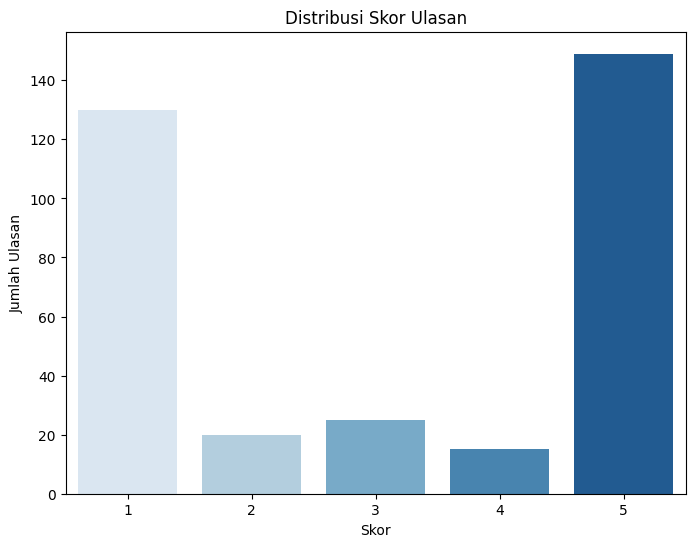

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='score', data=df, palette='Blues')
plt.title('Distribusi Skor Ulasan')
plt.xlabel('Skor')
plt.ylabel('Jumlah Ulasan')
plt.show()

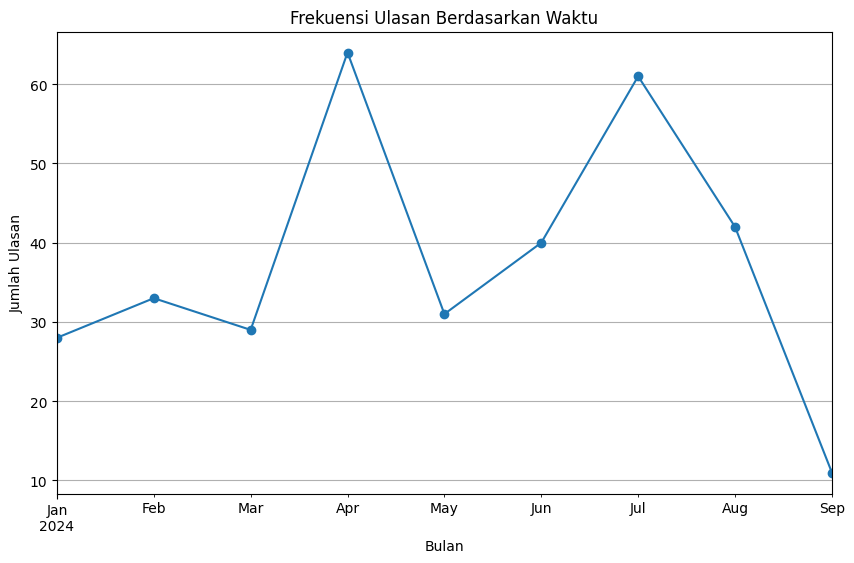

In [ ]:
df['at'] = pd.to_datetime(df['at'])

ulasan_per_bulan = df.groupby(df['at'].dt.to_period('M')).size()

plt.figure(figsize=(10, 6))
ulasan_per_bulan.plot(kind='line', marker='o')
plt.title('Frekuensi Ulasan Berdasarkan Waktu')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Ulasan')
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


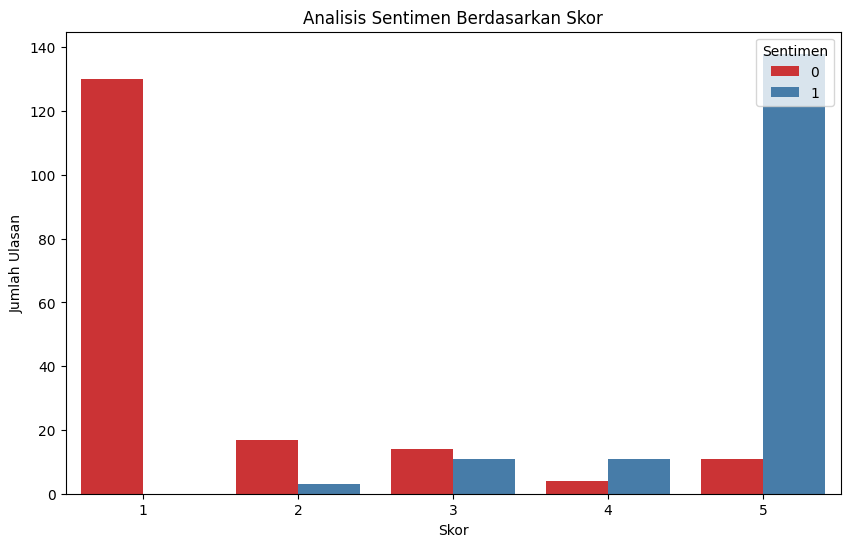

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='score', hue='label', data=df, palette='Set1')
plt.title('Analisis Sentimen Berdasarkan Skor')
plt.xlabel('Skor')
plt.ylabel('Jumlah Ulasan')
plt.legend(title='Sentimen', loc='upper right')
plt.show()

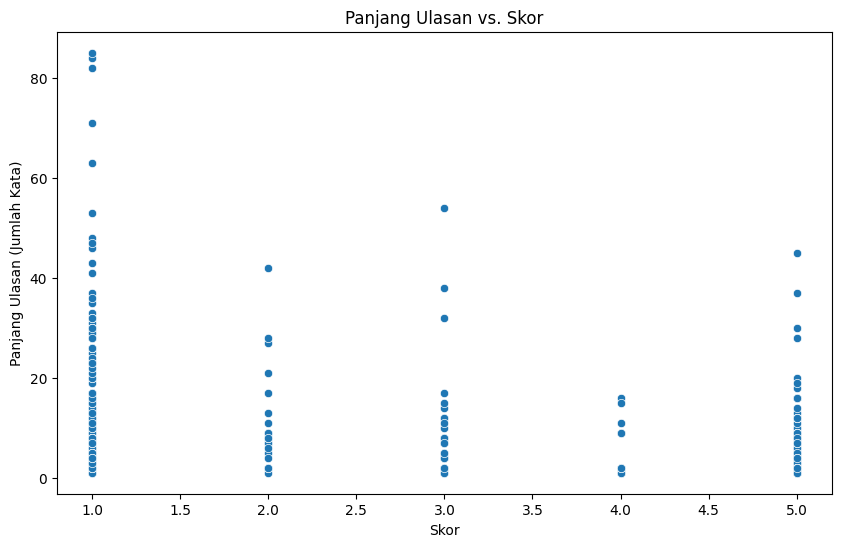

In [ ]:
df['content_length'] = df['content'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(10, 6))
sns.scatterplot(x='score', y='content_length', data=df)
plt.title('Panjang Ulasan vs. Skor')
plt.xlabel('Skor')
plt.ylabel('Panjang Ulasan (Jumlah Kata)')
plt.show()

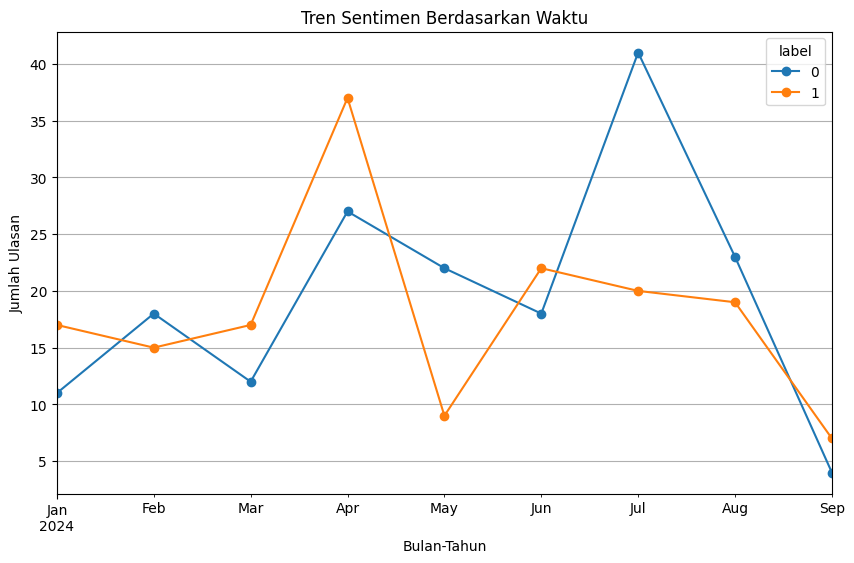

In [ ]:
df['month_year'] = df['at'].dt.to_period('M')
sentimen_per_waktu = df.groupby(['month_year', 'label']).size().unstack(fill_value=0)

sentimen_per_waktu.plot(kind='line', figsize=(10, 6), marker='o')
plt.title('Tren Sentimen Berdasarkan Waktu')
plt.xlabel('Bulan-Tahun')
plt.ylabel('Jumlah Ulasan')
plt.grid(True)
plt.show()

<ipython-input-16-97ba004aa018>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_users.index, x=top_users.values, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a 

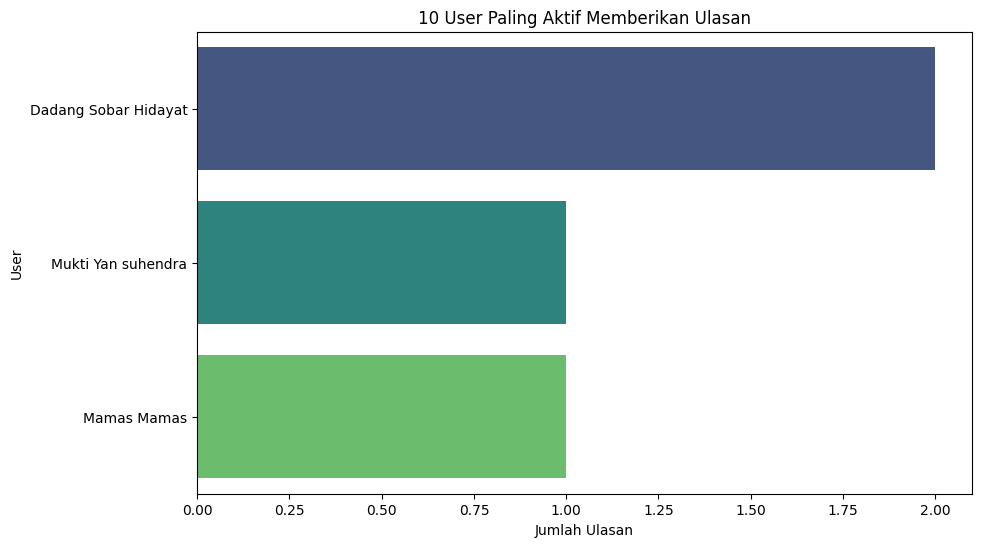

In [ ]:
top_users = df['userName'].value_counts().head(3)

plt.figure(figsize=(10, 6))
sns.barplot(y=top_users.index, x=top_users.values, palette='viridis')
plt.title('10 User Paling Aktif Memberikan Ulasan')
plt.xlabel('Jumlah Ulasan')
plt.ylabel('User')
plt.show()

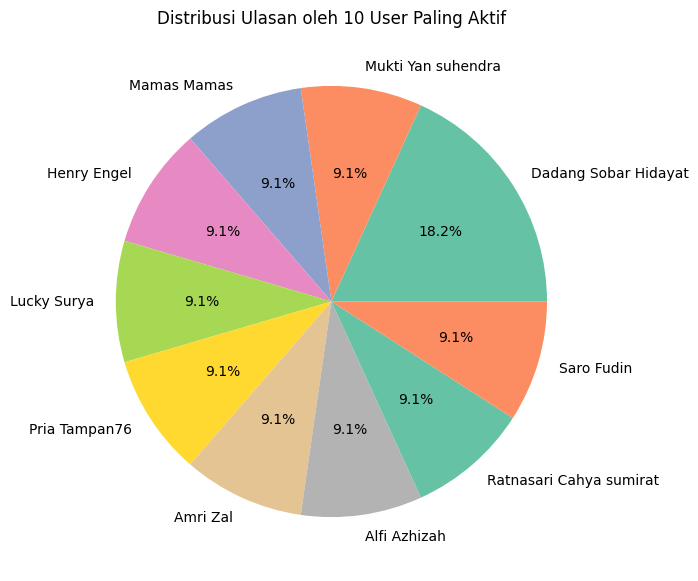

In [ ]:
plt.figure(figsize=(7, 7))
top_users.plot.pie(autopct='%1.1f%%', colors=sns.color_palette('Set2'))
plt.title('Distribusi Ulasan oleh 10 User Paling Aktif')
plt.ylabel('')
plt.show()

In [ ]:
distribusi_score = df.groupby('score').value_counts()
print(distribusi_score)

score
5    149
1    130
3     25
2     20
4     15
Name: count, dtype: int64


In [ ]:
# Hitung frekuensi ulasan berdasarkan bulan
df['at'] = pd.to_datetime(df['at'])
ulasan_per_bulan = df.groupby(df['at'].dt.to_period('M')).size()

print(ulasan_per_bulan)

at
2024-01    28
2024-02    33
2024-03    29
2024-04    64
2024-05    31
2024-06    40
2024-07    61
2024-08    42
2024-09    11
Freq: M, dtype: int64


In [ ]:
# Hitung sentimen berdasarkan skor
sentiment_distribution = df.groupby(['score', 'label']).size().unstack(fill_value=0)

print(sentiment_distribution)

label    0    1
score          
1      130    0
2       17    3
3       14   11
4        4   11
5       11  138


In [ ]:
df['content_length'] = df['content'].apply(lambda x: len(str(x).split()))

# Hitung rata-rata panjang ulasan per skor
average_length_per_score = df.groupby('score')['content_length'].mean()

print(average_length_per_score)

score
1    17.269231
2    11.450000
3    11.320000
4     5.000000
5     4.483221
Name: content_length, dtype: float64


In [ ]:
# Hitung jumlah ulasan per bulan berdasarkan sentimen
sentimen_per_waktu = df.groupby([df['at'].dt.to_period('M'), 'label']).size().unstack(fill_value=0)

print(sentimen_per_waktu)

label     0   1
at             
2024-01  11  17
2024-02  18  15
2024-03  12  17
2024-04  27  37
2024-05  22   9
2024-06  18  22
2024-07  41  20
2024-08  23  19
2024-09   4   7


In [ ]:
# Hitung sentimen berdasarkan skor
sentiment_distribution = df.groupby(['score', 'label']).size().unstack(fill_value=0)

print(sentiment_distribution)

label    0    1
score          
1      130    0
2       17    3
3       14   11
4        4   11
5       11  138
